In [22]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir(r'/content/gdrive/MyDrive/purp_hack')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
def seed_everything(seed=1):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()

In [4]:
df = pd.read_parquet('data_for_training.park')

In [5]:
df.head()

,feature4,feature22,feature26,feature27,feature31,feature33,feature35,feature36,feature37,feature43,...,feature923,feature924,feature927,feature928,feature929,feature934,feature935,feature945,feature1036,target
0,105469,91601,5,8,633,50524,16130,3652,85495,19131,...,31,0,31,30,0,4681,47452,58637,0,0
1,105610,36890,5,8,633,50524,18999,3652,85495,59900,...,31,1,31,23,3,4752,62319,78495,0,0
2,105227,140184,5,8,633,50524,65748,3652,85495,11110,...,31,1,31,30,1,4561,62319,78495,0,0
5,102441,140184,5,8,633,50524,65748,3652,85495,38606,...,31,1,31,27,2,3054,62319,78495,0,0
6,104006,140184,5,8,633,16988,65748,3652,0,17927,...,31,0,31,30,0,3952,62319,78495,0,0


In [6]:
from imblearn.over_sampling import SMOTE

x = df.drop(columns=['target'])
x = (x - x.mean()) / x.std(ddof=1)
y = df['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

smote = SMOTE()
x_val, y_val = smote.fit_resample(x_val, y_val)

del x
del y

In [6]:
#del df
del x
del y

# Лог регрессия

In [45]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
model1 = LogisticRegression(penalty = 'l2', warm_start=True, max_iter=1, solver='saga')  # Используем saga, чтобы поддерживалась warm_start

# Список для сохранения значений функции потерь
test_loss_history = []
test_accuracy_history = []
batch_size = 10_000
size = x_train.shape[0]

for epoch in range(30):
    order = np.random.permutation(size)
    for start_index in range(0, size, batch_size):
        batch_indexes = order[start_index:start_index + batch_size]

        x_batch = x_train.iloc[batch_indexes]#.to(device)
        y_batch = y_train.iloc[batch_indexes]#.to(device)
        model1.fit(x_batch, y_batch)

        preds = model1.predict(x_batch)
        preds_prob = model1.predict_proba(x_batch)

        loss_value = log_loss(preds, y_batch)


    test_preds = model1.predict(x_val)
    test_loss_history.append(log_loss(test_preds, y_val))

    accuracy = (test_preds == y_val).mean()
    test_accuracy_history.append(accuracy)

    print(f'эпоха {epoch}, точность {accuracy}, лосс {test_loss_history[-1]}')

эпоха 0, точность 0.6572104254809611, лосс 12.355388609367182
эпоха 1, точность 0.6574648758681249, лосс 12.346217287807526
эпоха 2, точность 0.6537229584098347, лосс 12.481089663684816
эпоха 3, точность 0.6389798036241718, лосс 13.012486824641359
эпоха 4, точность 0.6530144887043985, лосс 12.506625500184256
эпоха 5, точность 0.6524956094835156, лосс 12.525327802972573
эпоха 6, точность 0.6471870759160214, лосс 12.716666746883824
эпоха 7, точность 0.653433583459727, лосс 12.491519794085995
эпоха 8, точность 0.6529296719086772, лосс 12.509682607370808
эпоха 9, точность 0.6571854793645725, лосс 12.356287758539697
эпоха 10, точность 0.6571505548016284, лосс 12.357546567381215
эпоха 11, точность 0.6533038636545062, лосс 12.496195369783075
эпоха 12, точность 0.6515376786141933, лосс 12.559855131197159
эпоха 13, точность 0.6547108246188234, лосс 12.445483356453215
эпоха 14, точность 0.6556138740320907, лосс 12.412934156408161
эпоха 15, точность 0.6555490141294803, лосс 12.415271944256702
эпо

KeyboardInterrupt: 

In [46]:
y_pred = model1.predict(x_val)
y_pred_proba = model1.predict_proba(x_val)
accuracy = (test_preds == y_val).mean()

print(accuracy)

0.6483844895026742


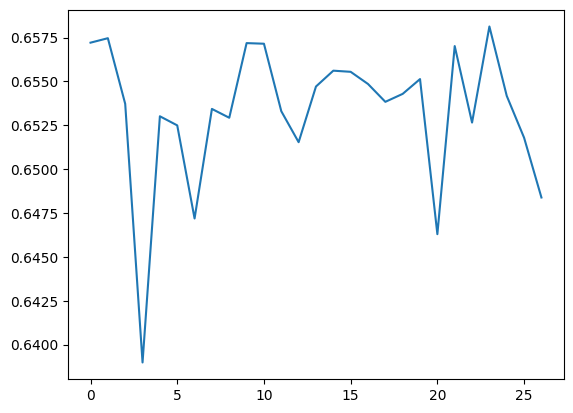

In [47]:
plt.plot(test_accuracy_history)

In [52]:
feature_importance = model1.coef_[0]
importance_df_log_reg = pd.DataFrame({'Feature': x_train.columns, 'Importance': abs(feature_importance)})

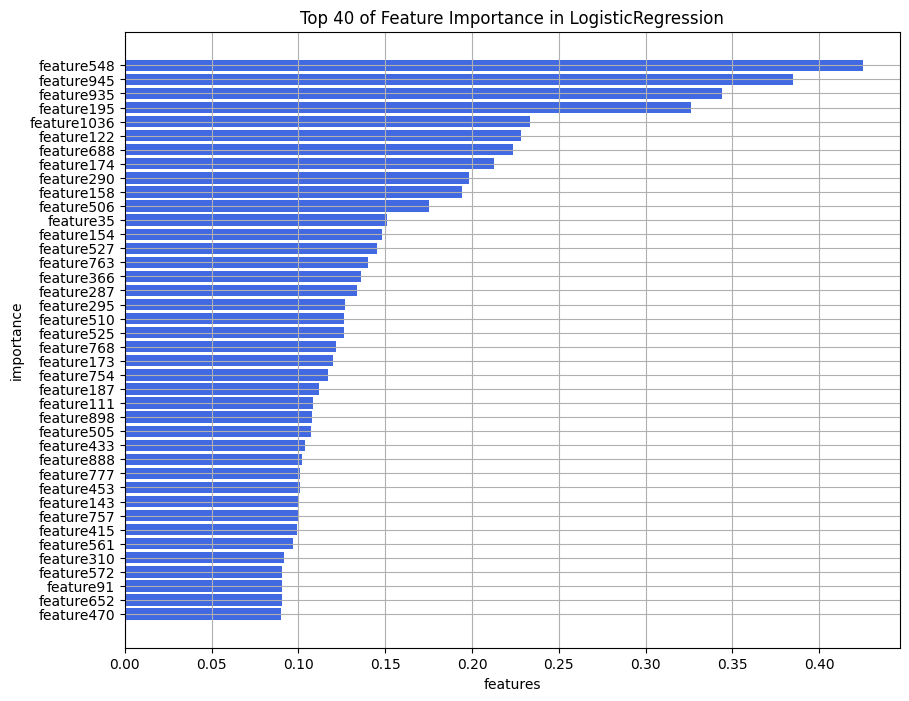

In [77]:
# Сортировка признаков по важности
importance_df_log_reg = importance_df_log_reg.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
how_many_features = 40
plt.figure(figsize=(10, 8))
plt.barh(importance_df_log_reg['Feature'].iloc[:how_many_features], importance_df_log_reg['Importance'].iloc[:how_many_features], color='royalblue', height=0.8)
plt.xlabel('features')
plt.ylabel('importance')
plt.title(f'Top {how_many_features} of Feature Importance in LogisticRegression')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [55]:
amount_of_features = []
loss_hist = []

for i in range(1, importance_df_log_reg.shape[0]):
    model1 = LogisticRegression(penalty = 'l2', max_iter=20)
    model1.fit(x_train[importance_df_log_reg['Feature'].iloc[:i]], y_train)

    # Вычисление метрик на валидационных данных
    y_pred_prob = model1.predict_proba(x_val[importance_df_log_reg['Feature'].iloc[:i]])
    val_loss = log_loss(y_val, y_pred_prob)

    amount_of_features.append(i)
    loss_hist.append(val_loss)
    print(f'if amount of features = {i}, loss is {val_loss}')

if amount of features = 1, loss is 0.6931795290552876
if amount of features = 2, loss is 0.6931741723754353
if amount of features = 3, loss is 0.6922728772354128
if amount of features = 4, loss is 0.6918047300763642
if amount of features = 5, loss is 0.6876800636852403
if amount of features = 6, loss is 0.6678216104331279
if amount of features = 7, loss is 0.6658902240309522
if amount of features = 8, loss is 0.6658150742955937
if amount of features = 9, loss is 0.665094529799368
if amount of features = 10, loss is 0.6652473065217677
if amount of features = 11, loss is 0.664978281771698
if amount of features = 12, loss is 0.6566946170870871
if amount of features = 13, loss is 0.6513455003525442
if amount of features = 14, loss is 0.6507149429526885
if amount of features = 15, loss is 0.6493111891148655
if amount of features = 16, loss is 0.6475322617617975
if amount of features = 17, loss is 0.6454289447609604
if amount of features = 18, loss is 0.6454542047635599
if amount of features

KeyboardInterrupt: 

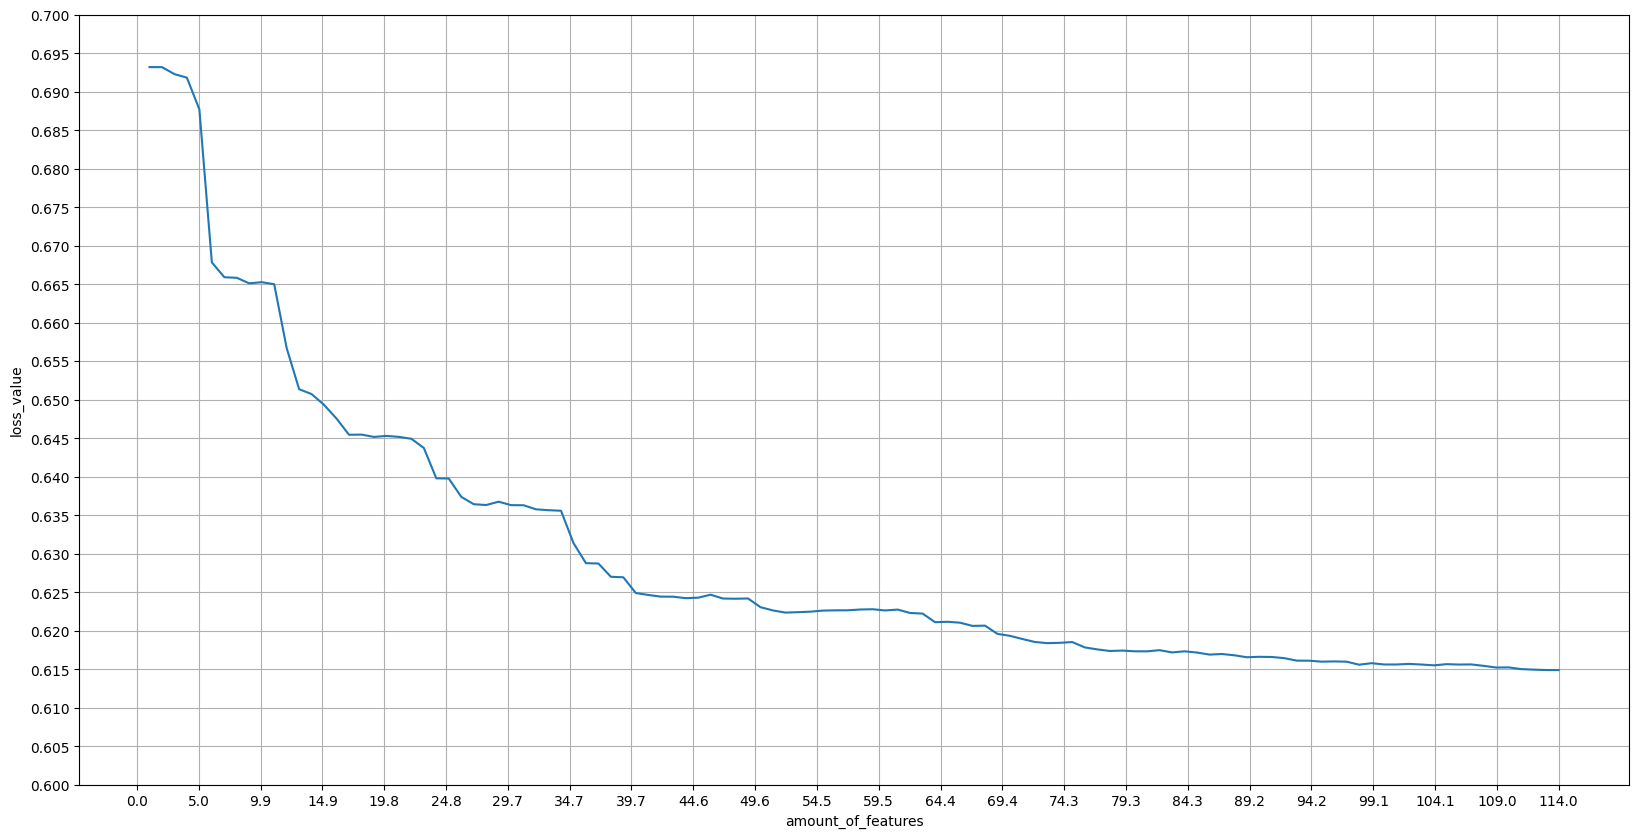

In [64]:
plt.figure(figsize=(20, 10))

plt.plot(amount_of_features, loss_hist)
plt.xlabel('amount_of_features')
plt.ylabel('loss_value')
ax = plt.gca()
ax.set_xticks(np.linspace(0, 114, 24))
ax.set_yticks(np.linspace(0.6, 0.7, 21))
plt.grid()

accuracy is 0.6564969665522471
f1 is 0.660706981603497
precision is 0.6527073211103862
recall is 0.6689051648439371


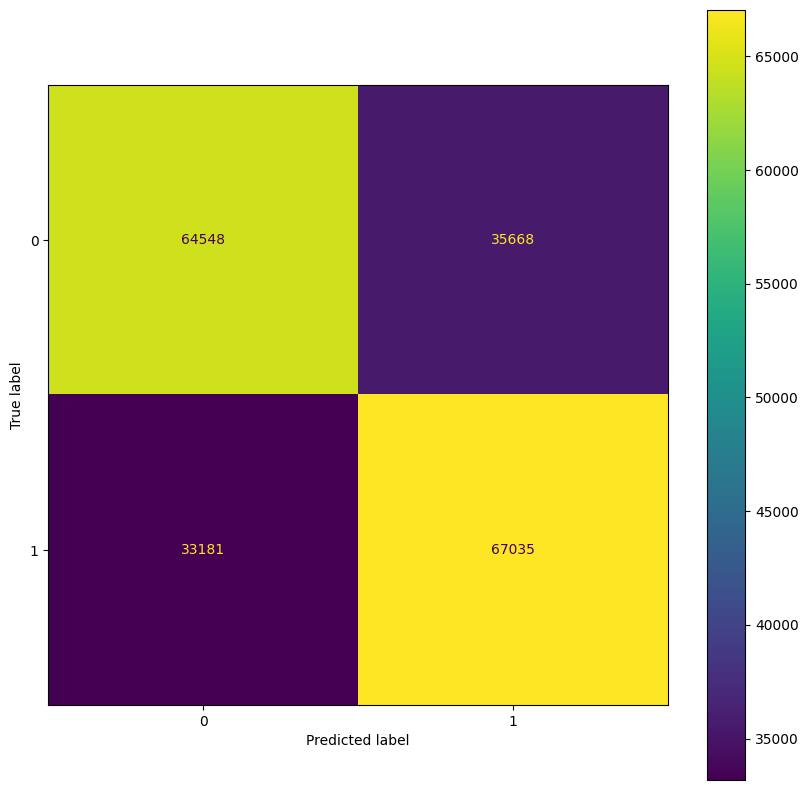

In [69]:
print(f'accuracy is {accuracy_score(y_val, y_pred)}')
print(f'f1 is {f1_score(y_val, y_pred)}')
print(f'precision is {precision_score(y_val, y_pred)}')
print(f'recall is {recall_score(y_val, y_pred)}')
conf_matrix = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=set(y_val))

display.plot(ax=ax)

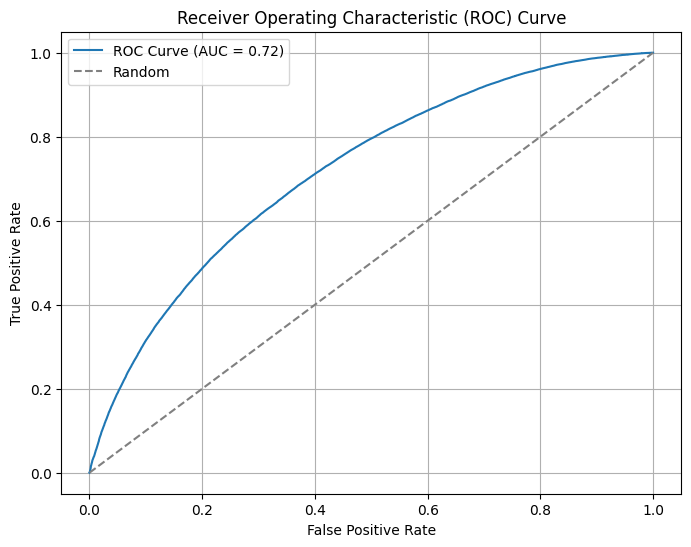

In [67]:
# Предположим, что y_true - истинные метки классов, y_score - оценки вероятностей классов (например, вероятности класса 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba[:, 1])

# Вычислим площадь под ROC-кривой (AUC)
auc = roc_auc_score(y_val, y_pred_proba[:, 1])

# Построим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


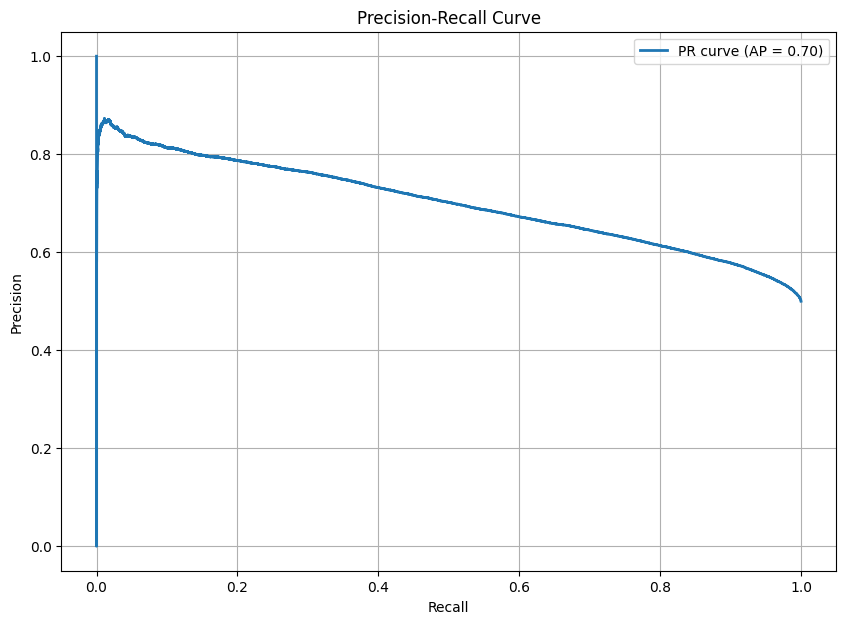

In [68]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Получение предсказаний
y_score = y_pred_prob[:, 1]  # Вероятность для положительного класса

# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_val, y_score)
average_precision = average_precision_score(y_val, y_score)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {average_precision:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


Ну а чего еще следовало ожидать от логистической регрессии? Мы убрали все скореллированные признаки, оставили только те, где линейная зависимость присутствует лишь частично.

# Дерево решений


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

arr_depth = []
test_loss_history = []
test_accuracy_history = []

for depth in range(5, 20):
    model2 = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model2.fit(x_train, y_train)

    # Вычисление метрик на валидационных данных
    y_pred = model2.predict(x_val)
    y_pred_prob = model2.predict_proba(x_val)
    val_loss = log_loss(y_val, y_pred_prob)

    val_accuracy = (y_pred == y_val).mean()

    arr_depth.append(depth)
    test_loss_history.append(val_loss)
    test_accuracy_history.append(val_accuracy)

    del model2
    print(f'глубина {depth}, точность {val_accuracy}, лосс {val_loss}')

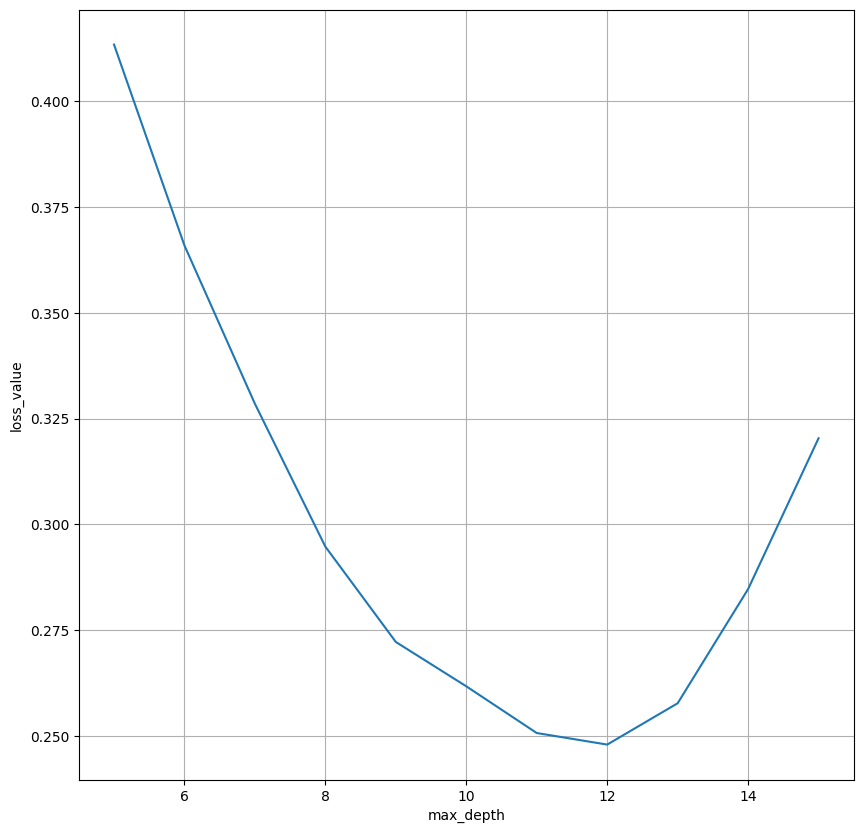

In [71]:
plt.figure(figsize=(10, 10))
plt.plot(arr_depth, test_loss_history)
plt.xlabel('max_depth')
plt.ylabel('loss_value')
plt.grid()

Отсюда видно, что мы хотим глубину 12

In [72]:
model2 = DecisionTreeClassifier(max_depth=12, random_state=0)
model2.fit(x_train, y_train)

# Вычисление метрик на валидационных данных
y_pred_prob = model2.predict_proba(x_val)
val_loss = log_loss(y_val, y_pred_prob)

print(f'лосс {val_loss}')

лосс 0.24789528420239432


In [82]:
acc_hist = []
porog_hist = []
max_acc = 0
total = 0
for i in np.linspace(0, 1, 500):
    y_pred = (y_pred_prob[:, 1] >= i).astype(int)
    data = accuracy_score(y_pred, y_val)
    if max_acc < data:
        max_acc = data
        porog = i
    acc_hist.append(accuracy_score(y_pred, y_val))
    porog_hist.append(i)
    if not total % 10:
        print(f'{total}) for porog {i} accuracy is {acc_hist[-1]}')
    total += 1

# print(f'accuracy is {accuracy}')
# print(f'precision is {precision_score(y_val, y1_pred)}')
# print(f'recall is {recall_score(y_val, y1_pred)}')
# print(f'f1 is {f1_score(y_val, y1_pred)}')
print()
print(f' max_accuracy is {max_acc} for trashold {porog}')

0) for porog 0.0 accuracy is 0.5
10) for porog 0.02004008016032064 accuracy is 0.5533298076155504
20) for porog 0.04008016032064128 accuracy is 0.6608226231340305
30) for porog 0.06012024048096192 accuracy is 0.7472908517601979
40) for porog 0.08016032064128256 accuracy is 0.7954568132833081
50) for porog 0.1002004008016032 accuracy is 0.8269138660493335
60) for porog 0.12024048096192384 accuracy is 0.8474345413905963
70) for porog 0.1402805611222445 accuracy is 0.8536161890316916
80) for porog 0.16032064128256512 accuracy is 0.8579518240600303
90) for porog 0.18036072144288576 accuracy is 0.8701255288576675
100) for porog 0.2004008016032064 accuracy is 0.8768959048455337
110) for porog 0.22044088176352702 accuracy is 0.8927766025385168
120) for porog 0.24048096192384769 accuracy is 0.8983595433862857
130) for porog 0.2605210420841683 accuracy is 0.9016125169633591
140) for porog 0.280561122244489 accuracy is 0.9024606849205715
150) for porog 0.3006012024048096 accuracy is 0.9035782709

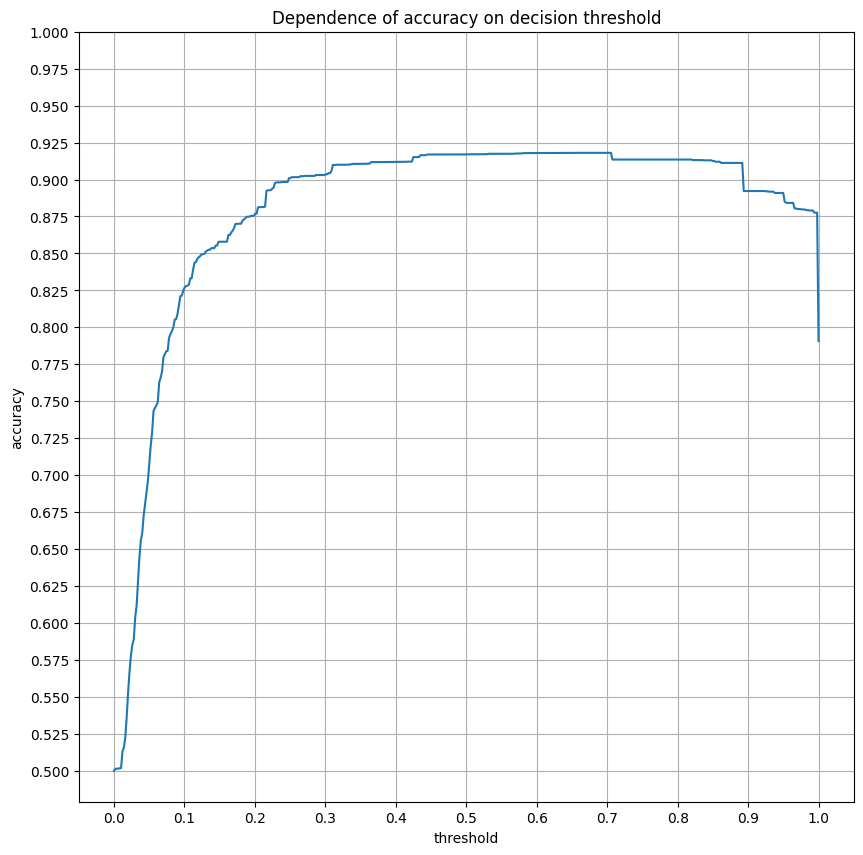

In [86]:
plt.figure(figsize=(10, 10))
plt.plot(porog_hist, acc_hist)
plt.title('Dependence of accuracy on decision threshold')
plt.xlabel('threshold')
plt.ylabel('accuracy')
ax = plt.gca()
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0.5, 1, 21))
plt.grid()

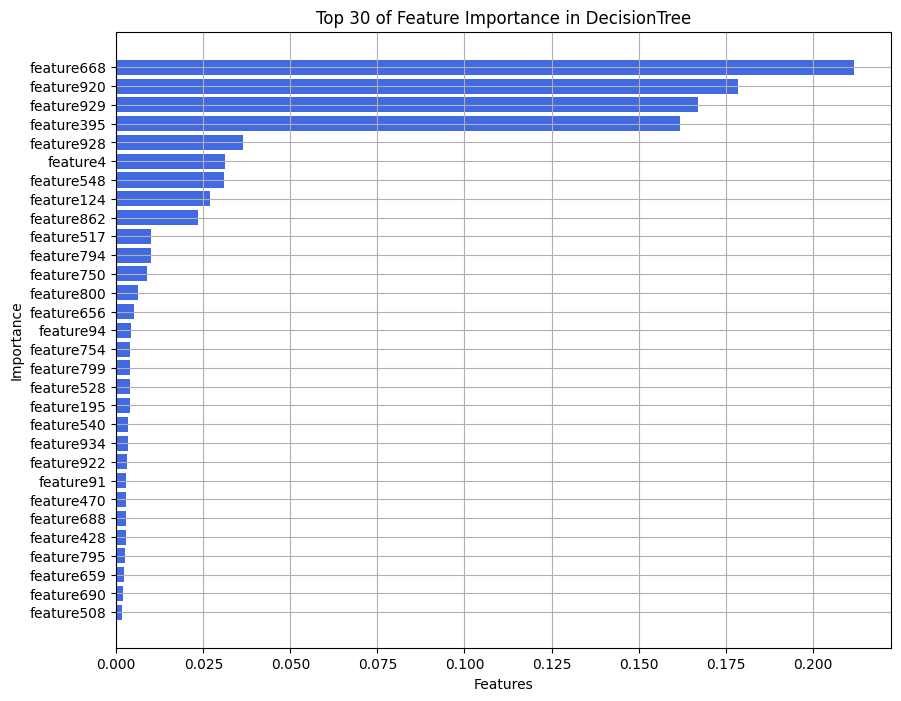

In [80]:
feature_importances = model2.feature_importances_
features = x_train.columns[:len(feature_importances)]

# Создание DataFrame для удобства визуализации
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
how_many_features = 30
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].iloc[:how_many_features], importance_df['Importance'].iloc[:how_many_features], color='royalblue', height=0.8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {how_many_features} of Feature Importance in DecisionTree')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [87]:
amount_of_features = []
loss_hist = []

for i in range(1, importance_df.shape[0]):
    model2 = DecisionTreeClassifier(max_depth=11, random_state=0)
    model2.fit(x_train[importance_df['Feature'].iloc[:i]], y_train)

    # Вычисление метрик на валидационных данных
    y_pred_prob = model2.predict_proba(x_val[importance_df['Feature'].iloc[:i]])
    val_loss = log_loss(y_val, y_pred_prob)

    amount_of_features.append(i)
    loss_hist.append(val_loss)
    print(f'if amount of features = {i}, loss is {val_loss}')

if amount of features = 1, loss is 0.5831478739212335
if amount of features = 2, loss is 0.3390291039215842
if amount of features = 3, loss is 0.24072486242737673
if amount of features = 4, loss is 0.20604136700543482
if amount of features = 5, loss is 0.1975711318480937
if amount of features = 6, loss is 0.20432296887373494
if amount of features = 7, loss is 0.20077836747355204
if amount of features = 8, loss is 0.22767845264661765
if amount of features = 9, loss is 0.23599968965424625
if amount of features = 10, loss is 0.23246423400991437
if amount of features = 11, loss is 0.23250205727755086
if amount of features = 12, loss is 0.23110643056789568
if amount of features = 13, loss is 0.22712894060358232
if amount of features = 14, loss is 0.2303131284886391
if amount of features = 15, loss is 0.23201836812073007
if amount of features = 16, loss is 0.22967796938806392
if amount of features = 17, loss is 0.2296949415582042
if amount of features = 18, loss is 0.22969405901825693
if amo

KeyboardInterrupt: 

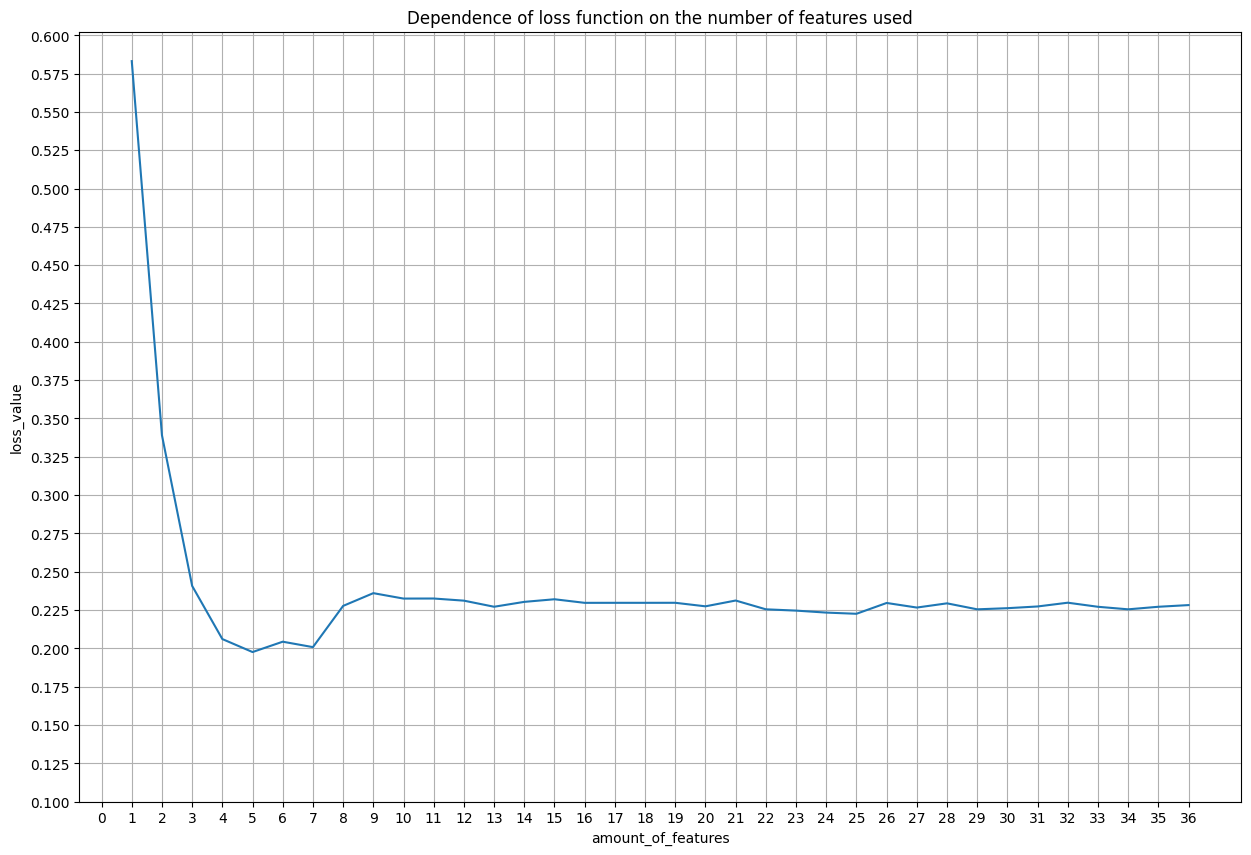

In [92]:
plt.figure(figsize=(15, 10))
plt.title('Dependence of loss function on the number of features used')
plt.plot(amount_of_features, loss_hist)
plt.xlabel('amount_of_features')
plt.ylabel('loss_value')
ax = plt.gca()
ax.set_xticks(np.linspace(0, 36, 37))
ax.set_yticks(np.linspace(0.1, 0.6, 21))
plt.grid()

берем 5 признаков

In [93]:
main_features = importance_df['Feature'].iloc[:5]

model2 = DecisionTreeClassifier(max_depth=12, random_state=0)
model2.fit(x_train[main_features], y_train)

# Вычисление метрик на валидационных данных
y_pred_prob = model2.predict_proba(x_val[main_features])

In [94]:
acc_hist = []
porog_hist = []
max_acc = 0

for j, i in enumerate(np.linspace(0, 1, 500)):
    y_pred = (y_pred_prob[:, 1] >= i).astype(int)
    data = accuracy_score(y_pred, y_val)
    if max_acc < data:
        max_acc = data
        porog = i
    acc_hist.append(accuracy_score(y_pred, y_val))
    porog_hist.append(i)
    if not j % 10:
        print(f'for porog {i} accuracy is {acc_hist[-1]}')

# print(f'accuracy is {accuracy}')
# print(f'precision is {precision_score(y_val, y1_pred)}')
# print(f'recall is {recall_score(y_val, y1_pred)}')
# print(f'f1 is {f1_score(y_val, y1_pred)}')
print()
print(f'max_accuracy is {max_acc} for trashold {porog}')

for porog 0.0 accuracy is 0.5
for porog 0.02004008016032064 accuracy is 0.5158208270136505
for porog 0.04008016032064128 accuracy is 0.6528648120060669
for porog 0.06012024048096192 accuracy is 0.7181637662648679
for porog 0.08016032064128256 accuracy is 0.7789774087969985
for porog 0.1002004008016032 accuracy is 0.831469026901892
for porog 0.12024048096192384 accuracy is 0.8639189351001836
for porog 0.1402805611222445 accuracy is 0.8686237726510737
for porog 0.16032064128256512 accuracy is 0.8783926718288497
for porog 0.18036072144288576 accuracy is 0.8934750937973976
for porog 0.2004008016032064 accuracy is 0.8988634549373353
for porog 0.22044088176352702 accuracy is 0.8988834118304463
for porog 0.24048096192384769 accuracy is 0.9011185838588649
for porog 0.2605210420841683 accuracy is 0.9133421808892792
for porog 0.280561122244489 accuracy is 0.9241787738484872
for porog 0.3006012024048096 accuracy is 0.9294324259599266
for porog 0.32064128256513025 accuracy is 0.9294324259599266
fo

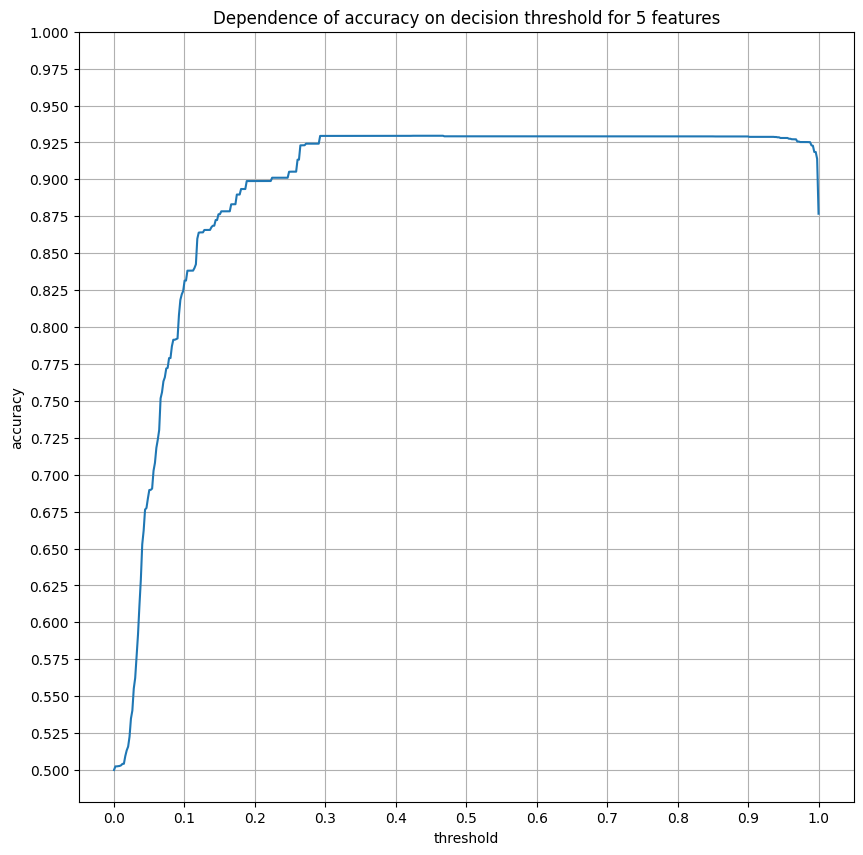

In [96]:
plt.figure(figsize=(10, 10))
plt.plot(porog_hist, acc_hist)
plt.title('Dependence of accuracy on decision threshold for 5 features')
plt.xlabel('threshold')
plt.ylabel('accuracy')
ax = plt.gca()
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0.5, 1, 21))
plt.grid()

accuracy is 0.9295421888720364
f1 is 0.9276551710005944
precision is 0.9531835600286352
recall is 0.9034585295761156


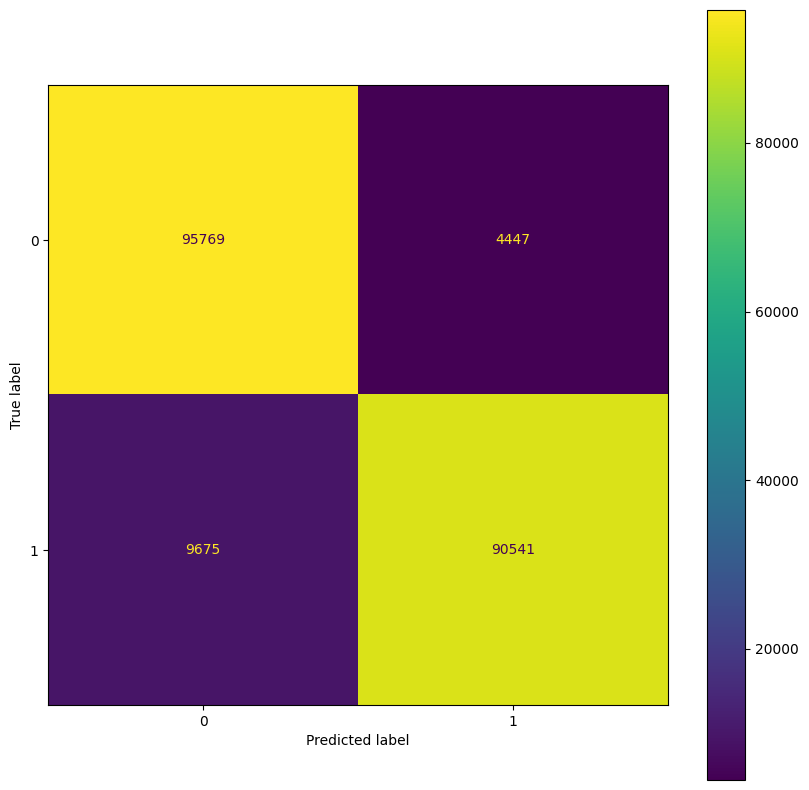

In [97]:
y_pred = (y_pred_prob[:, 1] >= porog).astype(int)

print(f'accuracy is {accuracy_score(y_val, y_pred)}')
print(f'f1 is {f1_score(y_val, y_pred)}')
print(f'precision is {precision_score(y_val, y_pred)}')
print(f'recall is {recall_score(y_val, y_pred)}')
conf_matrix = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=set(y_val))

display.plot(ax=ax)

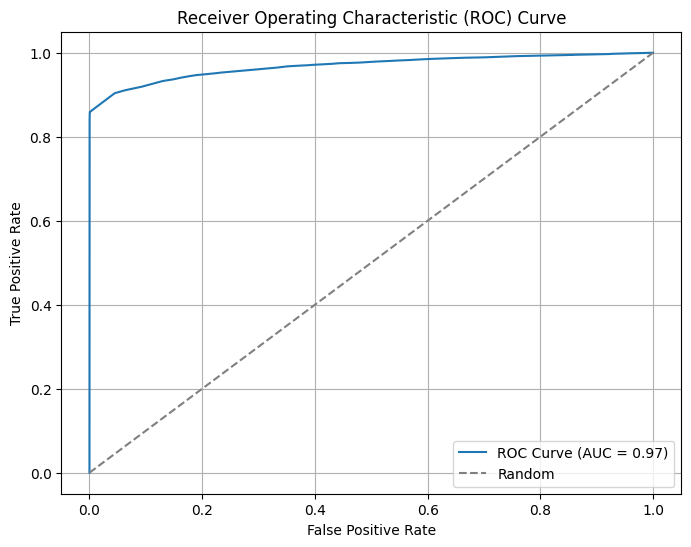

In [98]:
# Предположим, что y_true - истинные метки классов, y_score - оценки вероятностей классов (например, вероятности класса 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob[:, 1])

# Вычислим площадь под ROC-кривой (AUC)
auc = roc_auc_score(y_val, y_pred_prob[:, 1])

# Построим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


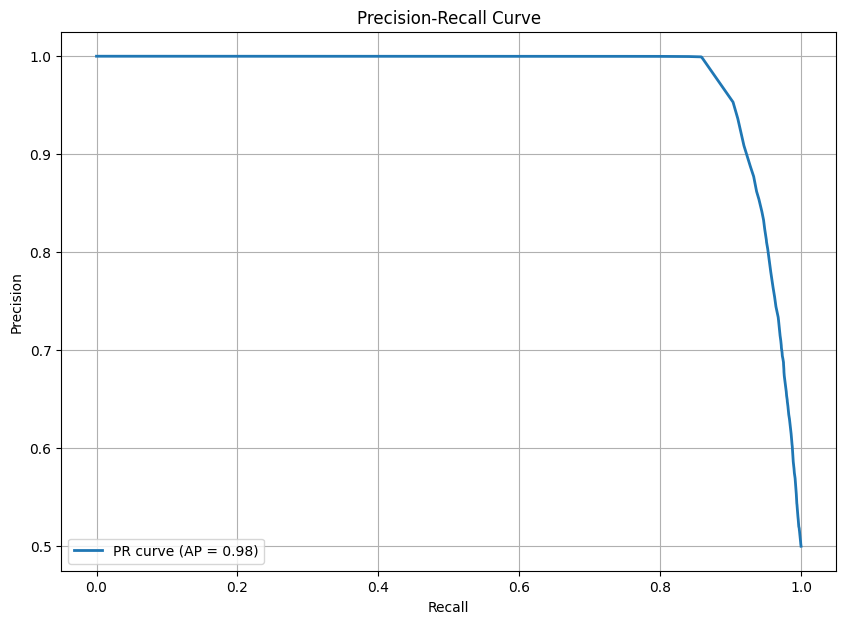

In [99]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Получение предсказаний
y_score = y_pred_prob[:, 1]  # Вероятность для положительного класса

# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_val, y_score)
average_precision = average_precision_score(y_val, y_score)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {average_precision:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# CatBoost

In [ ]:
!!pip install catboost

In [8]:
from catboost import CatBoostClassifier
# [importance_df['Feature'].iloc[:amount_of_import_feat]]
arr_depth = []
test_loss_history = []
test_accuracy_history = []

for depth in range(6, 7):
    model3 = CatBoostClassifier(iterations=1000, max_depth=depth, eval_metric='AUC', random_state=42, verbose=0, early_stopping_rounds=50)
    model3.fit(x_train, y_train)

    y_pred = model3.predict(x_val)
    y_pred_prob = model3.predict_proba(x_val)
    val_loss = log_loss(y_val, y_pred_prob)

    val_accuracy = (y_pred == y_val).mean()

    arr_depth.append(depth)
    test_loss_history.append(val_loss)
    test_accuracy_history.append(val_accuracy)

    print(f'глубина {depth}, точность {val_accuracy}, лосс {val_loss}')

NameError: name 'log_loss' is not defined

In [10]:
val_loss = log_loss(y_val, y_pred_prob)

val_accuracy = (y_pred == y_val).mean()

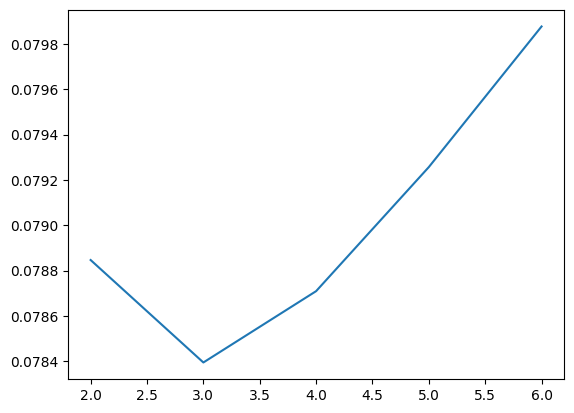

In [117]:
plt.plot(arr_depth, test_loss_history)

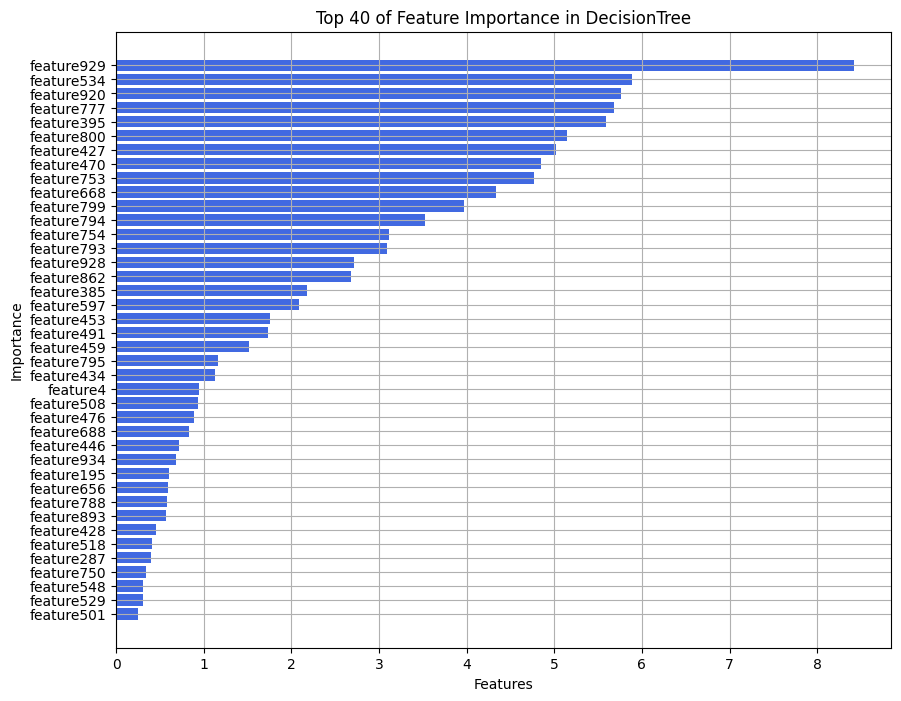

In [11]:
feature_importances = model3.feature_importances_
features = x_train.columns[:len(feature_importances)]

# Создание DataFrame для удобства визуализации
importance_df_cat = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
importance_df_cat = importance_df_cat.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
how_many_features = 40
plt.figure(figsize=(10, 8))
plt.barh(importance_df_cat['Feature'].iloc[:how_many_features], importance_df_cat['Importance'].iloc[:how_many_features], color='royalblue', height=0.8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {how_many_features} of Feature Importance in DecisionTree')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [126]:
amount_of_features = []
loss_hist = []

for i in range(1, importance_df.shape[0]):
    model3 = CatBoostClassifier(iterations=1000, max_depth=6, eval_metric='AUC', random_state=42, verbose=0, early_stopping_rounds=50)
    model3.fit(x_train[importance_df_cat['Feature'].iloc[:i]], y_train)

    # Вычисление метрик на валидационных данных
    y_pred_prob = model3.predict_proba(x_val[importance_df_cat['Feature'].iloc[:i]])
    val_loss = log_loss(y_val, y_pred_prob)

    amount_of_features.append(i)
    loss_hist.append(val_loss)
    print(f'if amount of features = {i}, loss is {val_loss}')

if amount of features = 1, loss is 0.3560535842450914
if amount of features = 2, loss is 0.17768833239936707
if amount of features = 3, loss is 0.12243638968658972
if amount of features = 4, loss is 0.09298908289010437
if amount of features = 5, loss is 0.08679257670707402
if amount of features = 6, loss is 0.08402025476375588
if amount of features = 7, loss is 0.08343976055499608
if amount of features = 8, loss is 0.08228791104448224
if amount of features = 9, loss is 0.08167010917642865
if amount of features = 10, loss is 0.08114731129405107
if amount of features = 11, loss is 0.08096867618067645
if amount of features = 12, loss is 0.08080292202819447
if amount of features = 13, loss is 0.08047372496740757
if amount of features = 14, loss is 0.08051583543446518
if amount of features = 15, loss is 0.08055932165457978
if amount of features = 16, loss is 0.08041050067050592


KeyboardInterrupt: 

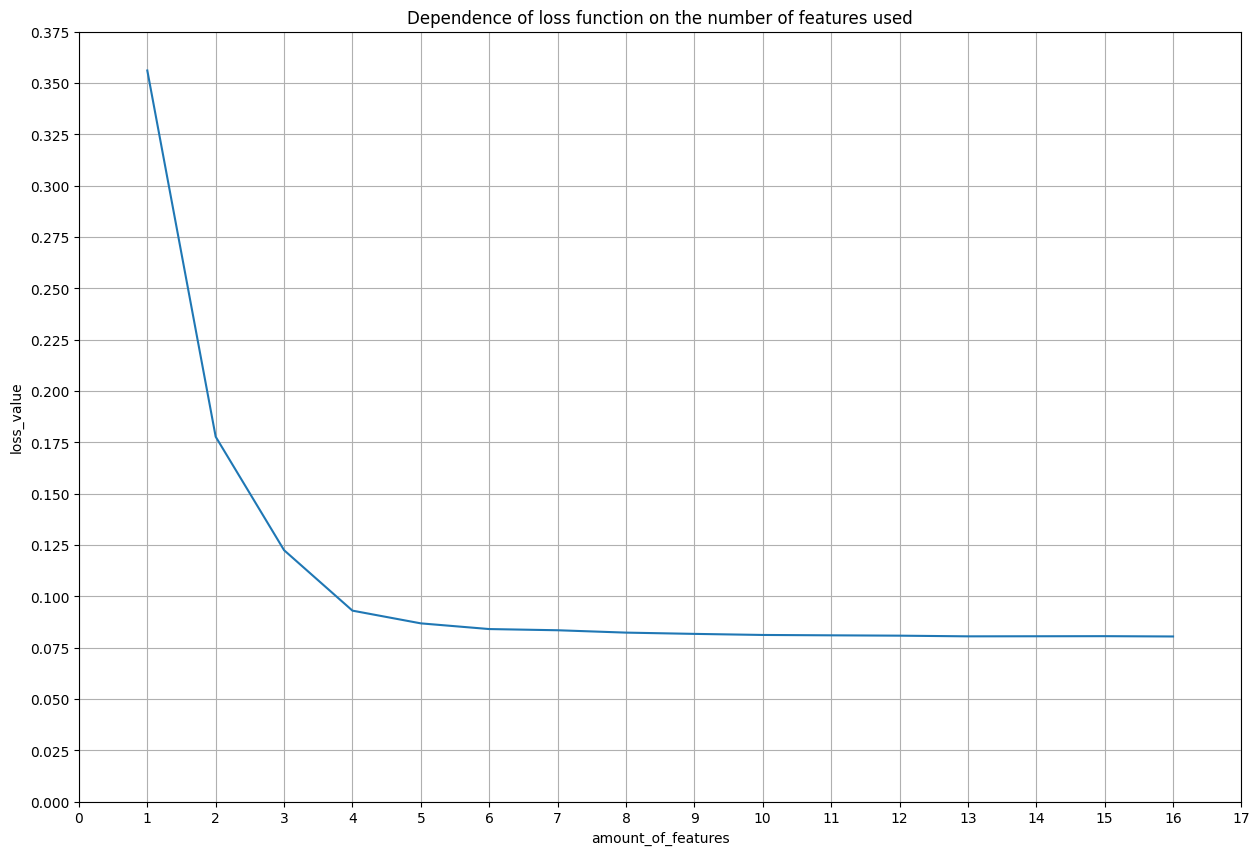

In [139]:
plt.figure(figsize=(15, 10))
plt.title('Dependence of loss function on the number of features used')
plt.plot(amount_of_features, loss_hist)
plt.xlabel('amount_of_features')
plt.ylabel('loss_value')
ax = plt.gca()
ax.set_xticks(np.linspace(0, 17, 18))
ax.set_yticks(np.linspace(0, 0.375, 16))
plt.grid()

In [151]:
model3 = CatBoostClassifier(iterations=1000, max_depth=12, eval_metric='AUC', random_state=42, verbose=0, early_stopping_rounds=50)
model3.fit(x_train[importance_df_cat['Feature'].iloc[:21]], y_train)

# Вычисление метрик на валидационных данных
y_pred3_prob = model3.predict_proba(x_val[importance_df_cat['Feature'].iloc[:21]])

In [153]:
acc_hist = []
porog_hist = []
max_acc = 0

for j, i in enumerate(np.linspace(0.4, 0.5, 500)):
    y_pred3 = (y_pred3_prob[:, 1] >= i).astype(int)
    data = accuracy_score(y_pred3, y_val)
    if max_acc < data:
        max_acc = data
        porog = i
    acc_hist.append(accuracy_score(y_pred3, y_val))
    porog_hist.append(i)
    if not j % 10:
        print(f'for porog {i} accuracy is {acc_hist[-1]}')

# print(f'accuracy is {accuracy}')
# print(f'precision is {precision_score(y_val, y1_pred)}')
# print(f'recall is {recall_score(y_val, y1_pred)}')
# print(f'f1 is {f1_score(y_val, y1_pred)}')
print()
print(f'max_accuracy is {max_acc} for trashold {porog}')

for porog 0.4 accuracy is 0.9801229344615631
for porog 0.4020040080160321 accuracy is 0.9801279236848407
for porog 0.40400801603206415 accuracy is 0.9801229344615631
for porog 0.4060120240480962 accuracy is 0.9801279236848407
for porog 0.4080160320641283 accuracy is 0.9801329129081184
for porog 0.41002004008016035 accuracy is 0.9801379021313962
for porog 0.4120240480961924 accuracy is 0.9801379021313962
for porog 0.4140280561122245 accuracy is 0.9801379021313962
for porog 0.41603206412825655 accuracy is 0.9801279236848407
for porog 0.4180360721442886 accuracy is 0.9801379021313962
for porog 0.4200400801603207 accuracy is 0.9801428913546739
for porog 0.42204408817635275 accuracy is 0.9801428913546739
for porog 0.42404809619238476 accuracy is 0.9801379021313962
for porog 0.4260521042084168 accuracy is 0.9801329129081184
for porog 0.4280561122244489 accuracy is 0.9801279236848407
for porog 0.43006012024048096 accuracy is 0.9801279236848407
for porog 0.432064128256513 accuracy is 0.9801329

accuracy is 0.9801428913546739
f1 is 0.9797612025303583
precision is 0.9989630428470696
recall is 0.9612836273648918


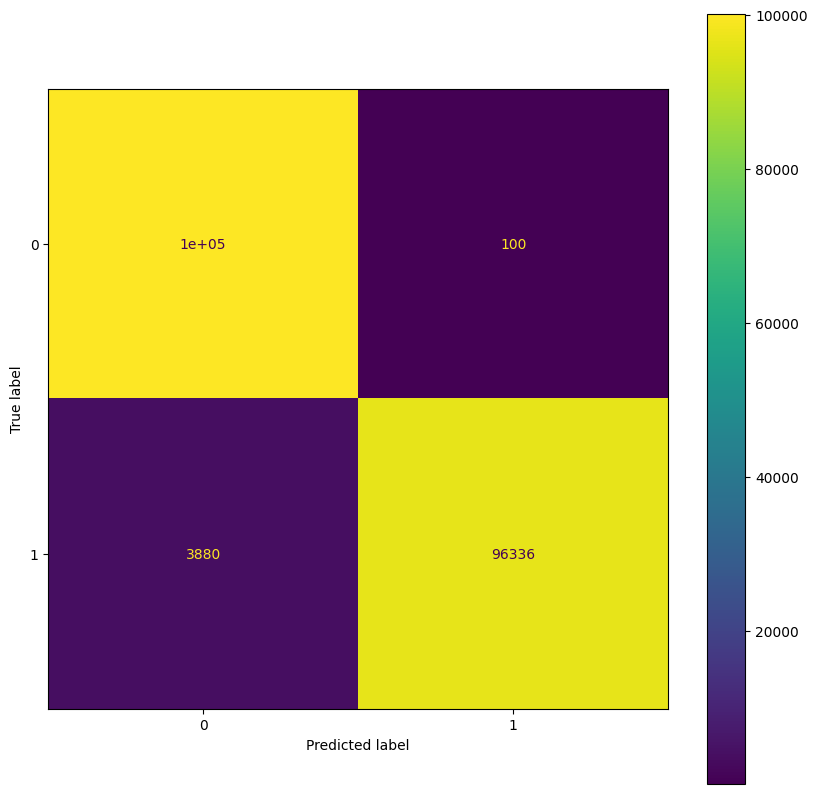

In [158]:
y_pred3 = (y_pred3_prob[:, 1] >= porog).astype(int)

print(f'accuracy is {accuracy_score(y_val, y_pred3)}')
print(f'f1 is {f1_score(y_val, y_pred3)}')
print(f'precision is {precision_score(y_val, y_pred3)}')
print(f'recall is {recall_score(y_val, y_pred3)}')
conf_matrix = confusion_matrix(y_val, y_pred3)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=set(y_val))

display.plot(ax=ax)

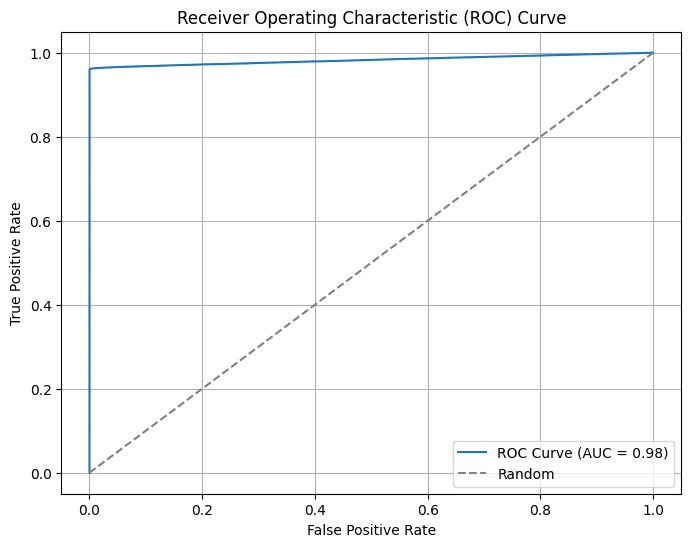

In [155]:
# Предположим, что y_true - истинные метки классов, y_score - оценки вероятностей классов (например, вероятности класса 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred3_prob[:, 1])

# Вычислим площадь под ROC-кривой (AUC)
auc = roc_auc_score(y_val, y_pred3_prob[:, 1])

# Построим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


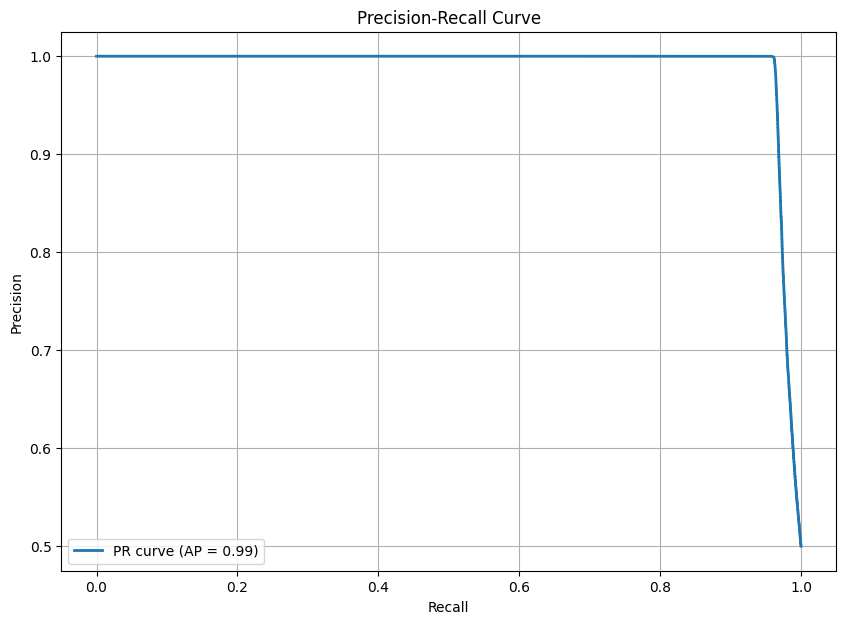

In [156]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Получение предсказаний
y_score = y_pred3_prob[:, 1]  # Вероятность для положительного класса

# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_val, y_score)
average_precision = average_precision_score(y_val, y_score)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {average_precision:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


#Нейронка

In [24]:
activation_dct =  {'ELU': torch.nn.ELU(), 'Hardtanh': torch.nn.Hardtanh(),
              'LeakyReLU': torch.nn.LeakyReLU(), 'LogSigmoid': torch.nn.LogSigmoid(),
              'PReLU': torch.nn.PReLU(), 'ReLU': torch.nn.ReLU(), 'ReLU6': torch.nn.ReLU6(),
              'SELU': torch.nn.SELU(), 'CELU': torch.nn.CELU(),
              'Sigmoid': torch.nn.Sigmoid(), 'Softplus': torch.nn.Softplus(),
              'Softshrink': torch.nn.Softshrink(), 'Softsign': torch.nn.Softsign(),
              'Tanh': torch.nn.Tanh(), 'Tanhshrink': torch.nn.Tanhshrink(),
              'Hardshrink': torch.nn.Hardshrink()}

data = 'ELU'

class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MyNet, self).__init__()
        self.batch_norm0 = torch.nn.BatchNorm1d(x_train.shape[-1])

        self.fc1 = torch.nn.Linear(x_train.shape[-1], n_hidden_neurons)
        self.act1 = activation_dct[data]
        self.batch_norm1 = torch.nn.BatchNorm1d(n_hidden_neurons)

        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons // 4)
        self.act2 = activation_dct[data]
        self.batch_norm2 = torch.nn.BatchNorm1d(n_hidden_neurons // 4)

        self.fc3 = torch.nn.Linear(n_hidden_neurons // 4, n_hidden_neurons // 10)
        self.act3 = activation_dct[data]
        self.batch_norm3 = torch.nn.BatchNorm1d(n_hidden_neurons // 10)

        self.fc4 = torch.nn.Linear(n_hidden_neurons // 10, n_hidden_neurons // 10)
        self.act4 = activation_dct[data]
        self.batch_norm4 = torch.nn.BatchNorm1d(n_hidden_neurons // 10)

        # self.fc5 = torch.nn.Linear(n_hidden_neurons // 10, n_hidden_neurons // 20)
        # self.act5 = activation_dct[data]
        # self.batch_norm5 = torch.nn.BatchNorm1d(n_hidden_neurons // 20)

        # self.fc6 = torch.nn.Linear(n_hidden_neurons // 20, n_hidden_neurons // 20)
        # self.act6 = activation_dct[data]
        # self.batch_norm6 = torch.nn.BatchNorm1d(n_hidden_neurons // 20)

        self.fc7 = torch.nn.Linear(n_hidden_neurons // 10, 2)
        self.sm = torch.nn.Softmax(dim=1)



    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.batch_norm1(x)

        x = self.fc2(x)
        x = self.act2(x)
        x = self.batch_norm2(x)

        x = self.fc3(x)
        x = self.act3(x)
        x = self.batch_norm3(x)

        x = self.fc4(x)
        x = self.act4(x)
        x = self.batch_norm4(x)

        # x = self.fc5(x)
        # x = self.act5(x)
        # x = self.batch_norm5(x)

        # x = self.fc6(x)
        # x = self.act6(x)
        # x = self.batch_norm6(x)

        x = self.fc7(x)

        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

my_net = MyNet(100)

In [8]:
x_train = torch.FloatTensor(np.array(x_train).astype('float64'))
x_test = torch.FloatTensor(np.array(x_val).astype('float64'))
y_train = torch.LongTensor(np.array(y_train).astype('int32'))
y_test = torch.LongTensor(np.array(y_val).astype('int32'))

In [25]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1.0e-3)
batch_size = 100
np.random.seed(0)
test_accuracy_history = []
test_loss_history = []


for epoch in range(40):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        optimizer.zero_grad()
        my_net.train()
        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = x_train[batch_indexes]#.to(device)
        y_batch = y_train[batch_indexes]#.to(device)
        preds = my_net.forward(x_batch)
        preds_prob = my_net.sm(preds)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    my_net.eval()
    test_preds = my_net.forward(x_test)
    test_loss_history.append(loss(test_preds, y_test).data)
    # if loss(test_preds, y_test).data < 0.6:
    #     break

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_history.append(accuracy)

    print(f'эпоха {epoch}, точность {accuracy}, лосс {test_loss_history[-1]}')

эпоха 0, точность 0.8470304012298584, лосс 6.0395307540893555
эпоха 1, точность 0.8743164539337158, лосс 6.416903972625732
эпоха 2, точность 0.8945677280426025, лосс 2.757040500640869
эпоха 3, точность 0.9013980031013489, лосс 6.006069183349609
эпоха 4, точность 0.9083279967308044, лосс 1.1619305610656738
эпоха 5, точность 0.9138910174369812, лосс 7.38567590713501
эпоха 6, точность 0.9170441627502441, лосс 0.7212947607040405
эпоха 7, точность 0.9137412905693054, лосс 6.369821071624756
эпоха 8, точность 0.9003851413726807, лосс 0.33114078640937805
эпоха 9, точность 0.9258601665496826, лосс 9.593720436096191
эпоха 10, точность 0.9153129458427429, лосс 0.2829752564430237
эпоха 11, точность 0.9298515319824219, лосс 6.420441150665283
эпоха 12, точность 0.9185808897018433, лосс 0.25638970732688904
эпоха 13, точность 0.9287089705467224, лосс 0.5141412615776062
эпоха 14, точность 0.9250219464302063, лосс 0.40693095326423645
эпоха 15, точность 0.9233904480934143, лосс 0.4779810905456543
эпоха 1

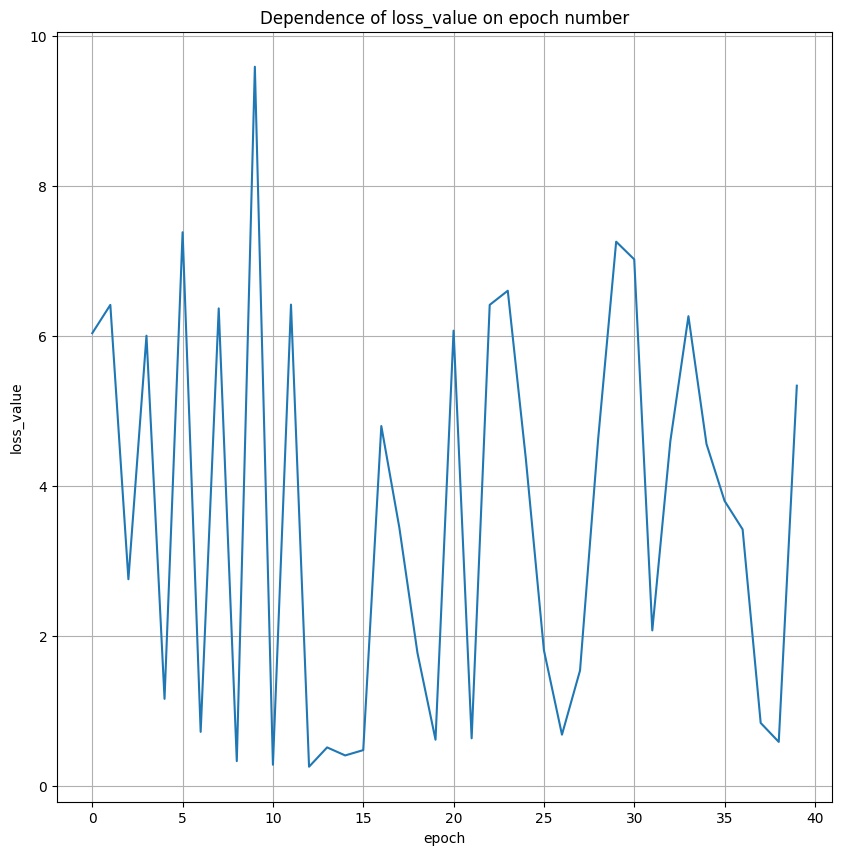

In [26]:
plt.figure(figsize=(10, 10))
plt.title('Dependence of loss_value on epoch number')
plt.plot(test_loss_history)
plt.xlabel('epoch')
plt.ylabel('loss_value')
plt.grid()

In [ ]:
test_loss_history[6]

tensor(0.4453)

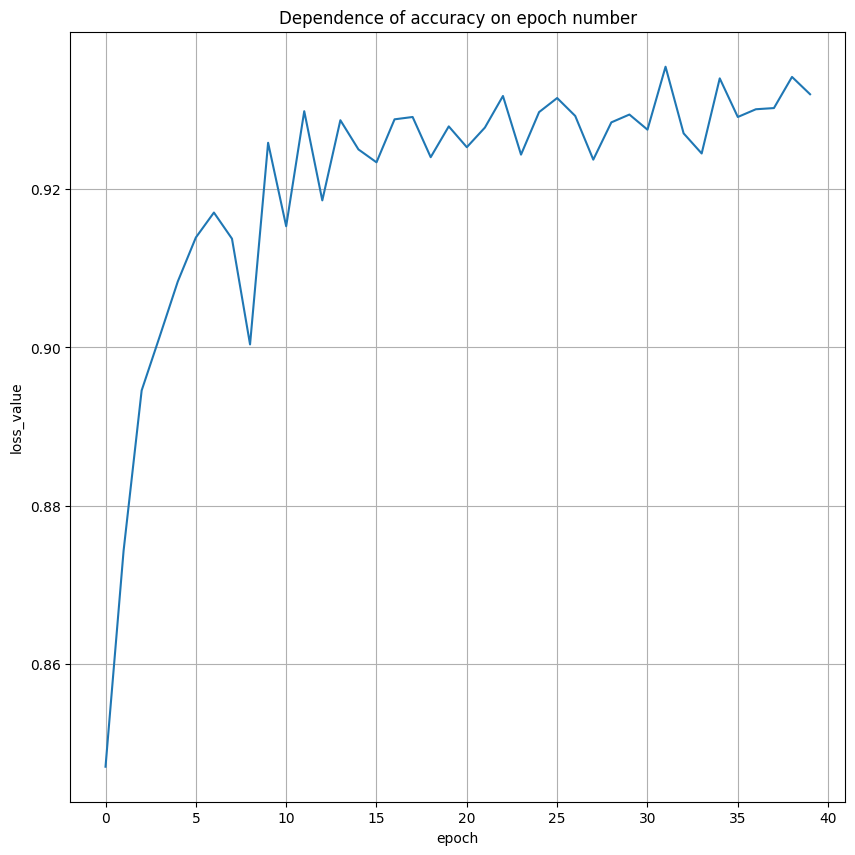

In [27]:
plt.figure(figsize=(10, 10))
plt.title('Dependence of accuracy on epoch number')
plt.plot(test_accuracy_history)
plt.xlabel('epoch')
plt.ylabel('loss_value')
plt.grid()

In [36]:
my_net.eval()
y_pred4 = my_net.forward(x_test)
y_score4 = my_net.sm(y_pred4).detach().numpy()

acc_hist = []
porog_hist = []
max_acc = 0

for j, i in enumerate(np.linspace(0.4, 0.5, 500)):
    y_pred4 = (y_score4[:, 1] >= i).astype(int)
    data = accuracy_score(y_pred4, y_val)
    if max_acc < data:
        max_acc = data
        porog = i
    acc_hist.append(accuracy_score(y_pred4, y_val))
    porog_hist.append(i)
    if not j % 10:
        print(f'for porog {i} accuracy is {acc_hist[-1]}')

# print(f'accuracy is {accuracy}')
# print(f'precision is {precision_score(y_val, y1_pred)}')
# print(f'recall is {recall_score(y_val, y1_pred)}')
# print(f'f1 is {f1_score(y_val, y1_pred)}')
# print()
print(f'max_accuracy is {max_acc} for trashold {porog}')
# y_pred4 = y_pred4.argmax(dim=1).detach().numpy()

for porog 0.4 accuracy is 0.9314979643969027
for porog 0.4020040080160321 accuracy is 0.9315428674064021
for porog 0.40400801603206415 accuracy is 0.9315877704159017
for porog 0.4060120240480962 accuracy is 0.931617705755568
for porog 0.4080160320641283 accuracy is 0.9316376626486789
for porog 0.41002004008016035 accuracy is 0.9316326734254011
for porog 0.4120240480961924 accuracy is 0.931652630318512
for porog 0.4140280561122245 accuracy is 0.9316825656581783
for porog 0.41603206412825655 accuracy is 0.931742436337511
for porog 0.4180360721442886 accuracy is 0.9317474255607887
for porog 0.4200400801603207 accuracy is 0.9318372315797877
for porog 0.42204408817635275 accuracy is 0.9318721561427317
for porog 0.42404809619238476 accuracy is 0.9318821345892871
for porog 0.4260521042084168 accuracy is 0.9319270375987866
for porog 0.4280561122244489 accuracy is 0.9319669513850084
for porog 0.43006012024048096 accuracy is 0.932061746627285
for porog 0.432064128256513 accuracy is 0.93212660652

accuracy is 0.931991897501397
f1 is 0.9282982741298321
precision is 0.981611062286547
recall is 0.8804781671589367


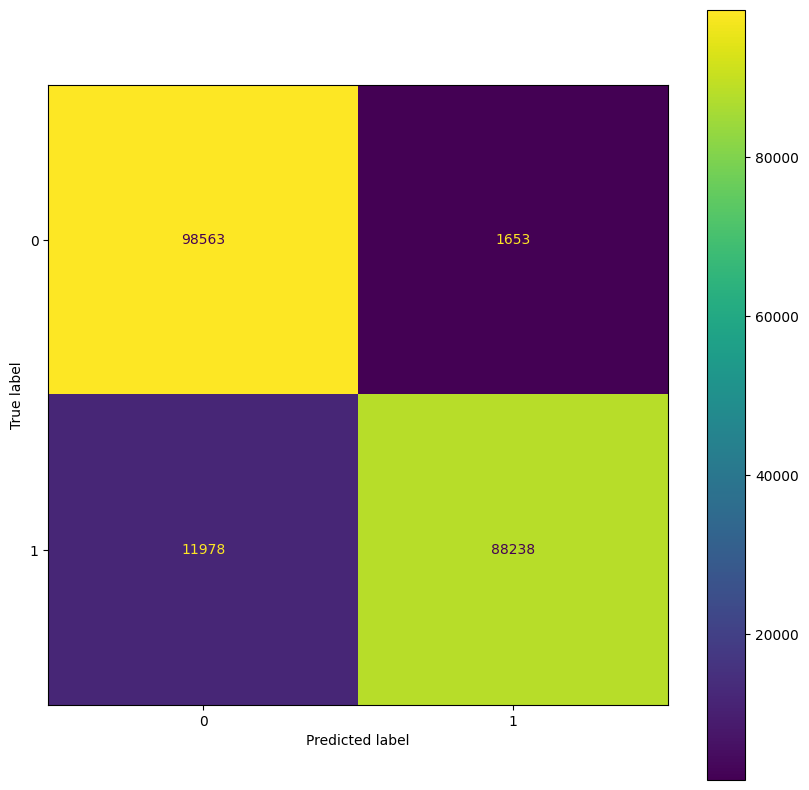

In [37]:
print(f'accuracy is {accuracy_score(y_val, y_pred4)}')
print(f'f1 is {f1_score(y_val, y_pred4)}')
print(f'precision is {precision_score(y_val, y_pred4)}')
print(f'recall is {recall_score(y_val, y_pred4)}')
conf_matrix = confusion_matrix(y_val, y_pred4)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=set(y_val))

display.plot(ax=ax)

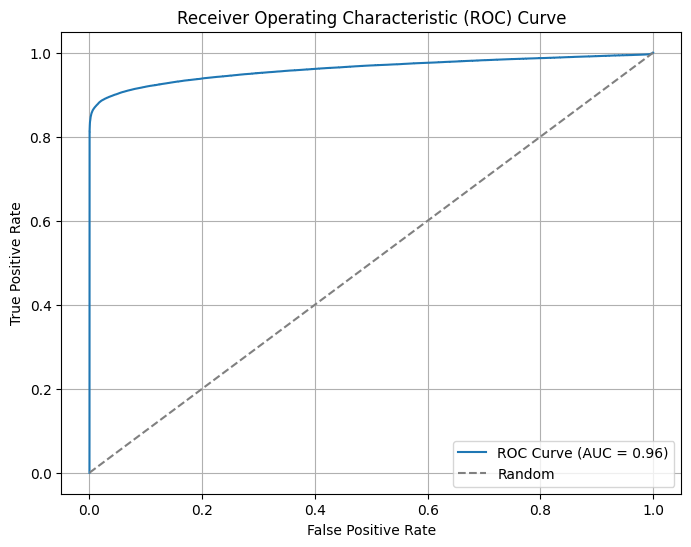

In [38]:
# Предположим, что y_true - истинные метки классов, y_score - оценки вероятностей классов (например, вероятности класса 1)
fpr, tpr, thresholds = roc_curve(y_val, y_score4[:, 1])

# Вычислим площадь под ROC-кривой (AUC)
auc = roc_auc_score(y_val, y_score4[:, 1])

# Построим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

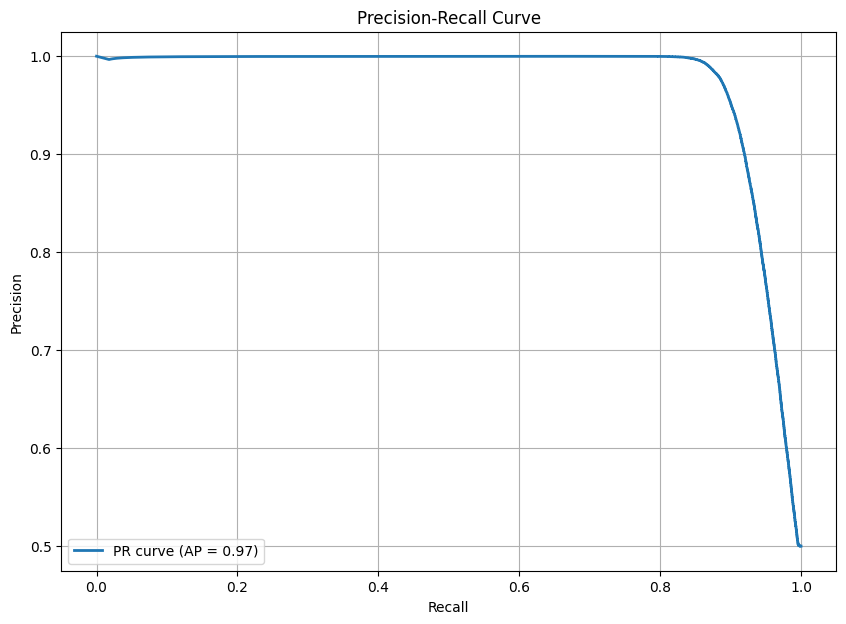

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Получение предсказаний
y_score = y_score4[:, 1]  # Вероятность для положительного класса

# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_val, y_score)
average_precision = average_precision_score(y_val, y_score)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {average_precision:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()
